## Overview
Use Logistic Regression to perform classfication of a dataset. We'll focus on binary classfication, so that we have two outputs, a positive and negative, (1 or 0). To give some examples of what we mean by binary: we could classify email as either spam or not spam, or tumors as either malignant or benigh. In both these cases we have a set of data and features, but only two possible outputs. It is possible to have more than just two classes, but for now we will focus on binary classification.

In order to perform this classification, we will be suing the logistic function to perform logistic regression.

Here is an overview of what we will do throughout this lecture:

1. Basic mathematical overview of the logistic function
2. Extra math resources
3. DataSet Analysis
4. Data Visualization
5. Data Preparation
6. Multicollinearity Consideration
7. Logistic Regression with ScikIT Learn
8. Testing and Training Data Sets
9. Conclusion and More Resources

## Imports
**Module Install Notice**
Install [Statsmodels](http://www.statsmodels.org/stable/index.html)

statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. An extensive list of result statistics are available for each estimator. The results are tested against existing statistical packages to ensure that they are correct. 

In [2]:
!pip install statsmodels

In [3]:
# Data Imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Math
import math

#Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Machine Learning Imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# For evaluating our ML results
from sklearn import metrics

# Dataset Import
import statsmodels.api as sm


## Basic Mathematical Overview

[Logistic Function](https://en.wikipedia.org/wiki/Logistic_function). The logistic function can take an input from negative to positive infinity 负无穷到正无穷 and it has an output between 0 and 1. The logistic function is defined as: 

σ(t)=1/(1+e**(−t))

A graph of the logistic function looks like this (following code):

Text(0.5, 1.0, 'Logistic Function')

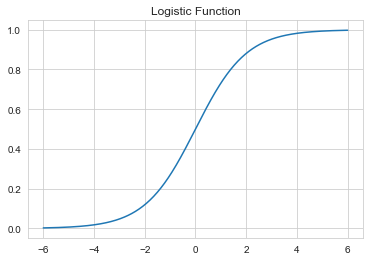

In [4]:
# Logistic Function
def logistic (t):
    return 1.0 / (1 + math.exp((-1.0)*t))
# Set t from -6 to 6 (500 elements, linearly spaced)
t = np.linspace(-6,6,500)
# Set up y values (using list comprehension)
y = np.array([logistic(ele) for ele in t])
#Plot
plt.plot(t,y)
plt.title('Logistic Function')

## DataSet Description
From the [Statsmodels website](we have the following information about the data):
Number of observations: 

Number of observations: 6366 Number of variables: 9 Variable name definitions:

rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                4 = good, 5 = very good
age             : Age
yrs_married     : No. years married. Interval approximations. See
                original paper for detailed explanation.
children        : No. children
religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                4 = strongly
educ            : Level of education, 9 = grade school, 12 = high
                school, 14 = some college, 16 = college graduate,
                17 = some graduate school, 20 = advanced degree
occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                or unskilled worker; 3 = white-colloar; 4 = teacher
                counselor social worker, nurse; artist, writers;
                technician, skilled worker, 5 = managerial,
                administrative, business, 6 = professional with
                advanced degree
occupation_husb : Husband's occupation. Same as occupation.
affairs         : measure of time spent in extramarital affairs


## Data Visualization

In [5]:
# Standard method of loading Statsmodels datasets into a pandas DataFrame. Note the name fair tands for 'affair' dataset.
df = sm.datasets.fair.load_pandas().data

In [6]:
# Preview
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


Let's go ahead and start our classfication by creating a new column called 'Had_Affair'. We will set this column equal to 0 if the affairs column is 0 (meaning no time spent in affairs) otherwise the 'Had_Affair' value will be set as 1, indicating that the woman had an affair.

In [7]:
# Create check function
def affair_check(x):
    if x != 0:
        return 1
    else:
        return 0
# Apply to DataFrame
df['Had_Affair'] = df['affairs'].apply(affair_check)

In [8]:
df.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


In [9]:
# Groupby Had Affair column
df.groupby('Had_Affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_Affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [10]:
df[df['Had_Affair'] == 0].count()

rate_marriage      4313
age                4313
yrs_married        4313
children           4313
religious          4313
educ               4313
occupation         4313
occupation_husb    4313
affairs            4313
Had_Affair         4313
dtype: int64

Looking at this brief glance of the data, it seems that the women who had affairs were slightly older,married longer, and slightly less religious and less educated. However, the mean values of both classes are very close for all variables.

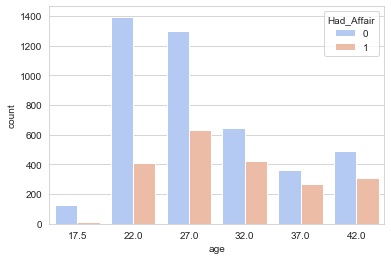

In [11]:
# Countplot for age with Had Affair hue
sns.countplot('age',data=df,hue='Had_Affair',palette='coolwarm')

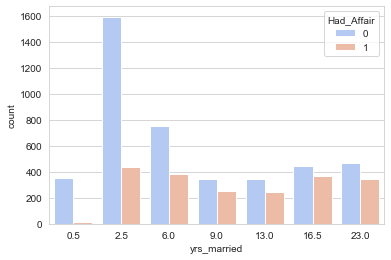

In [12]:
# Countplot for years married with Had Affair hue
sns.countplot('yrs_married',data=df,hue='Had_Affair',palette='coolwarm')

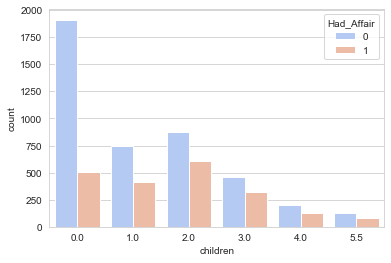

In [13]:
# Countplot for number of children with Had Affair hue
sns.countplot('children',data=df,hue='Had_Affair',palette='coolwarm')

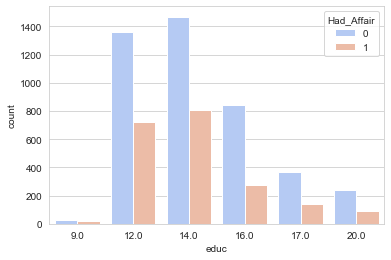

In [14]:
# Countplot for education level with Had Affair hue
sns.countplot('educ',data=df,hue='Had_Affair',palette='coolwarm')

## Data Preparation
If we look at the data, we'll notice that two columns are unlike the others. Occupation and Husband's Occupation. These columns are in a format know as Categorical Varibales. Bsically they are in set quantity/category, so that 1.0 and 2.0 are separete variables, not values along a spectrum that goes from 1-2 (e.g. There is no 1.5 for the occupation column). Pandas has a built in method of getting [dummy variables](https://en.wikipedia.org/wiki/Dummy_variable_%28statistics%29] and creating new columns from them.

In [15]:
# Create new DataFrames for the Categorical Variables
occ_dummies = pd.get_dummies(df['occupation'])
hus_occ_dummies = pd.get_dummies(df['occupation_husb'])

# Let's take a quick look at the results
occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [16]:
hus_occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,0,0,0,1,0
1,0,0,0,1,0,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,1,0,0


In [17]:
# Create column names for the new DataFrames
occ_dummies.columns = ['occ1','occ2','occ3','occ4','occ5','occ6']
hus_occ_dummies.columns = ['hocc1','hocc2','jocc3','hocc4','hocc5','hocc6']

Now create the X and Y datasets for our logistic regression

In [18]:
# Set X as new DataFrame without the occupation columns or the Y target
X = df.drop(['occupation','occupation_husb','Had_Affair'],axis=1)

In [20]:
# Concat the dummy DataFrames Together
dummies = pd.concat([occ_dummies,hus_occ_dummies],axis=1)

In [21]:
dummies

,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,jocc3,hocc4,hocc5,hocc6
0,0,1,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6361,0,0,0,1,0,0,0,0,1,0,0,0
6362,0,0,0,0,1,0,0,0,0,0,1,0
6363,0,0,1,0,0,0,1,0,0,0,0,0
6364,0,0,1,0,0,0,0,0,0,1,0,0


Now we will concatenate all the DataFrames together

In [22]:
# Now Concat the X DataFrame with the X DataFrame witht the dummy variables
X = pd.concat([X,dummies],axis=1)

# Preview of Result
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,jocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,0,1,0,0,0,0,0,0,1,0,0


In [23]:
# Set Y as Target class, Had Affair
Y = df.Had_Affair

# Preview
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Had_Affair, dtype: int64

### Multicollinearity Consideration
Now we need to get rid of a few columns. We will be dropping the occ1 and hocc1 columns to avoid [Multicollinearity](https://en.wikipedia.org/wiki/Multicollinearity#Remedies_for_multicollinearity)多重共线性. Multicollinearity occurs due to the dummy variables we created. Dummy variables are highly correlated, our model begins to get distorted because one of the dummy variables can be linearly predicted from the others. We take care of this problem by dropping one of the dummy variables from each set, we do this at the cost of losing a dataset point

The other column we will drop is the affairs column. This is because it is basically a repeat of what will be our Y target, instead of 0 and 1, it just has 0 or a number, so we'll need to drop it for our target to make sense.

In [24]:
# Dropping one column of each dummy variable set to avoid multicollinearity
X = X.drop('occ1',axis=1)
X = X.drop('hocc1',axis=1)
# Drop affairs column so Y target makes senses
X = X.drop('affairs',axis=1)
# Preview
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hocc2,jocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0


In [25]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
6361    0
6362    0
6363    0
6364    0
6365    0
Name: Had_Affair, Length: 6366, dtype: int64

In order to use the Y with SciKit Learn, we need to set it as a 1-D array. This means we need to "flatten" the array. Numpy has a built in method for this called [ravel](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ravel.html)

In [26]:
# Flatten array
Y = np.ravel(Y)
# Check result
Y

array([1, 1, 1, ..., 0, 0, 0])

### Logistic Regression with SciKit Learn
It is similar process to the Linear Regression from the previous lecture.
- we create the lecture
- Fit the data into model
- Check our accuracy score
- Split the data into testing and training sets and see if our results improve


In [28]:
# Create LogisticRegression model/object
log_model = LogisticRegression()
# Fit our data
log_model.fit(X,Y)
# Check out accuracy
log_model.score(X,Y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7258875274897895

We got a 73% accuracy rating. Let's go ahead and compare this to the original Y data. We can do this by simply taking the mean of the Y data, since it is in the format 1 or 0, we can use the mean to calculate the percentage of women who reported having affairs. This is known as checking the [null error rate](https://en.wikipedia.org/wiki/Type_I_and_type_II_errors)

In [29]:
# Check percentage of women that had affairs
Y.mean()

0.3224945020420987

This means that if our model just simply guessed "no affair" we would have had 0.68 accuracy. 0.72 is a slightly better that 0.68, but not that better. 
Go ahead and check the coefficients of our model to check what seemed to be the stronger predictors

In [31]:
# Use zip the bring the column names and the np.transpose function to bring togetherthe coefficients from the mondel

In [32]:
coeff_df = DataFrame(zip(X.columns, np.transpose(log_model.coef_)))

In [33]:
coeff_df

,0,1
0,rate_marriage,[-0.6978455096539518]
1,age,[-0.05633632456391041]
2,yrs_married,[0.10389299187350667]
3,children,[0.01818532144142296]
4,religious,[-0.3685066403819364]
5,educ,[0.008647374145728168]
6,occ2,[0.2981188865493084]
7,occ3,[0.6081502910503018]
8,occ4,[0.3465112689847115]
9,occ5,[0.9422595517777723]


Looking at the coefffcients we can see that a positive corresponds to increasing the likelihood of having an affair while a negative coefficient means it corresponds to a decreased likelihood of having an affairs as the actual data value point increases

As you might expect, an increase marriage rating corresponded to a decrease in the likelihood of having an affair. Increased religiousness also seems to correspond to a decrease in the likelihood of having an affair.

Since all the dummy variables (the wife and husband occupations) are positive that means the lowest likelihood of having an affair corresponds to the baseline occupation we dropped

### Testing and Training Data Sets
Just like we did in the Linear Regression Lecture, we should be splitting our data into training and testing data sets. We'll a very similar procedure to the Linear Regression Lecture by using SciKit Learn's built-in train_test_split method.

In [35]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)
# Make a new log_model
log_model2 = LogisticRegression()
# Now fit the new model using training data
log_model2.fit(X_train, Y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Now we use predict to predict classification labels for the next test set, then we will reevaluate our accuracy score.

In [36]:
# Predict the classes of the testing data set
class_predict = log_model2.predict(X_test)

# Compare the predicted classes to the actual test classes
print (metrics.accuracy_score(Y_test,class_predict))

0.7399497487437185


Now we have a 73.35% accuracy score, which is basically the same as our previous accuracy score, 72.58%

### Conclusion and more Resources
We can try some [regularization techniques](https://en.wikipedia.org/wiki/Regularization_%28mathematics%29#Regularization_in_statistics_and_machine_learning)